<a href="https://colab.research.google.com/github/meena-shankar/E-commerce-Review-Sentiment-Analysis/blob/main/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [276]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [277]:
import pandas as pd
import numpy as np
path='/content/drive/My Drive/dataset/Clothing Reviews.csv'
df=pd.read_csv(path)


In [278]:
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [279]:
df.columns

Index(['Unnamed: 0', 'Clothing ID', 'Age', 'Title', 'Review Text', 'Rating',
       'Recommended IND', 'Positive Feedback Count', 'Division Name',
       'Department Name', 'Class Name'],
      dtype='object')

In [280]:
df.drop(["Clothing ID", "Title"], axis=1, inplace=True)
df.head()

,Unnamed: 0,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [281]:
df.isnull().sum()

Unnamed: 0                   0
Age                          0
Review Text                845
Rating                       0
Recommended IND              0
Positive Feedback Count      0
Division Name               14
Department Name             14
Class Name                  14
dtype: int64

In [282]:
len(df)

23486

In [283]:
df.describe()

,Unnamed: 0,Age,Rating,Recommended IND,Positive Feedback Count
count,23486.000000,23486.000000,23486.000000,23486.000000,23486.000000
mean,11742.500000,43.198544,4.196032,0.822362,2.535936
std,6779.968547,12.279544,1.110031,0.382216,5.702202
min,0.000000,18.000000,1.000000,0.000000,0.000000
25%,5871.250000,34.000000,4.000000,1.000000,0.000000
50%,11742.500000,41.000000,5.000000,1.000000,1.000000
75%,17613.750000,52.000000,5.000000,1.000000,3.000000
max,23485.000000,99.000000,5.000000,1.000000,122.000000


In [284]:
df['Age'].unique()

array([33, 34, 60, 50, 47, 49, 39, 24, 53, 44, 41, 32, 55, 31, 28, 46, 21,
       36, 65, 29, 38, 59, 40, 23, 67, 48, 43, 52, 56, 66, 61, 57, 58, 37,
       27, 62, 68, 51, 83, 69, 54, 63, 71, 30, 35, 64, 42, 22, 26, 72, 25,
       45, 74, 70, 20, 80, 93, 82, 77, 85, 73, 78, 79, 19, 76, 84, 75, 89,
       81, 90, 94, 86, 99, 18, 91, 87, 92])

In [285]:
df['Department Name'].unique()

array(['Intimate', 'Dresses', 'Bottoms', 'Tops', 'Jackets', 'Trend', nan],
      dtype=object)

In [286]:
df['Class Name'].unique()

array(['Intimates', 'Dresses', 'Pants', 'Blouses', 'Knits', 'Outerwear',
       'Lounge', 'Sweaters', 'Skirts', 'Fine gauge', 'Sleep', 'Jackets',
       'Swim', 'Trend', 'Jeans', 'Legwear', 'Shorts', 'Layering',
       'Casual bottoms', nan, 'Chemises'], dtype=object)

In [287]:
df['Recommended IND'].unique()

array([1, 0])

In [288]:
df['Division Name'].unique()

array(['Initmates', 'General', 'General Petite', nan], dtype=object)

In [289]:
df['Division Name'].nunique()

3

In [290]:
df['Division Name'].value_counts()

General           13850
General Petite     8120
Initmates          1502
Name: Division Name, dtype: int64

In [291]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Values according to rating

In [292]:
df['Rating'].value_counts()

5    13131
4     5077
3     2871
2     1565
1      842
Name: Rating, dtype: int64

**13131 items are given a rating of 5**

Text(0.5, 1.0, 'Countplot based on Rating')

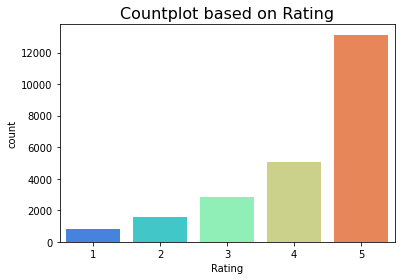

In [335]:
sns.countplot(x='Rating', data=df, palette='rainbow')
plt.title('Countplot based on Rating', fontsize=16)

Rating based on percentage.

In [294]:
df["Rating"].dtypes

dtype('int64')

Text(0.5, 1.0, 'Pie chart based on Ratings')

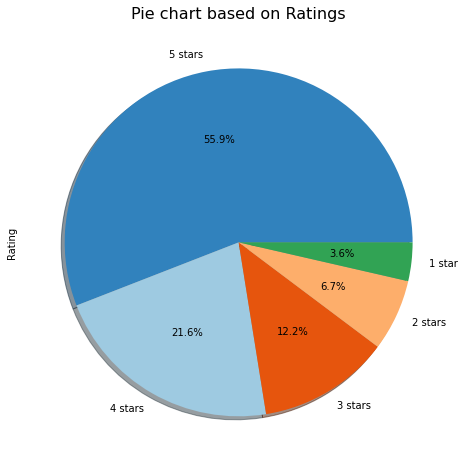

In [334]:
plt.figure(figsize=(8,8))
labels = ["5 stars", "4 stars", "3 stars", "2 stars", "1 star"]
cmap = plt.get_cmap("tab20c")
df["Rating"].value_counts().plot.pie(autopct='%1.1f%%', shadow=True, labels=labels, colors = cmap(np.arange(5)*2)) #this kind of cmap can be used only if there are numeric values in the column
plt.title('Pie chart based on Ratings', fontsize=16)


#  Recommended Index. (1- Yes, 0-No)

In [296]:
df['Recommended IND'].value_counts()

1    19314
0     4172
Name: Recommended IND, dtype: int64

Text(0.5, 1.0, 'Recommeded index')

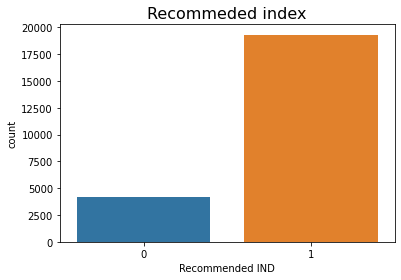

In [336]:
sns.countplot(x="Recommended IND", data=df)
plt.title('Recommeded index', fontsize=16)

***Ratings and division name based on Index classifies according to division name***

Text(0.5, 1.0, 'Recommended index based on Division Name')

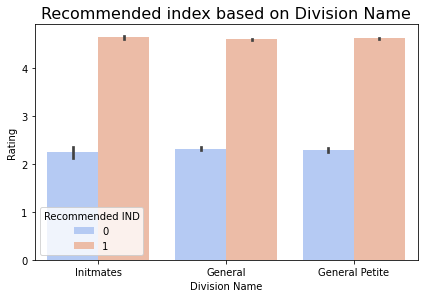

In [337]:
sns.barplot(x="Division Name", y="Rating", data=df, palette='coolwarm',hue='Recommended IND')
plt.tight_layout()
plt.title('Recommended index based on Division Name', fontsize=16)

***Ratings based on Recommended Index***

Text(0.5, 1.0, 'Rating based on Recommended index')

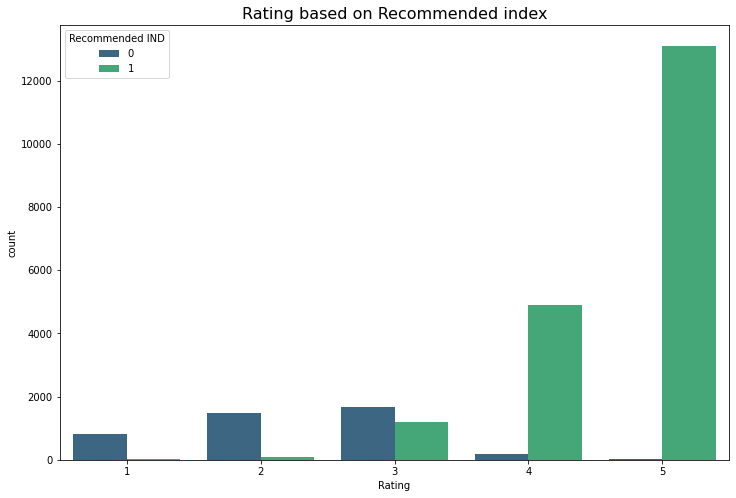

In [338]:
plt.figure(figsize = (12,8))
sns.countplot(x='Rating',data=df,hue='Recommended IND',palette='viridis')
plt.title('Rating based on Recommended index', fontsize=16)

***Rating based on Division Name***

Text(0.5, 1.0, 'Rating based on Division Name')

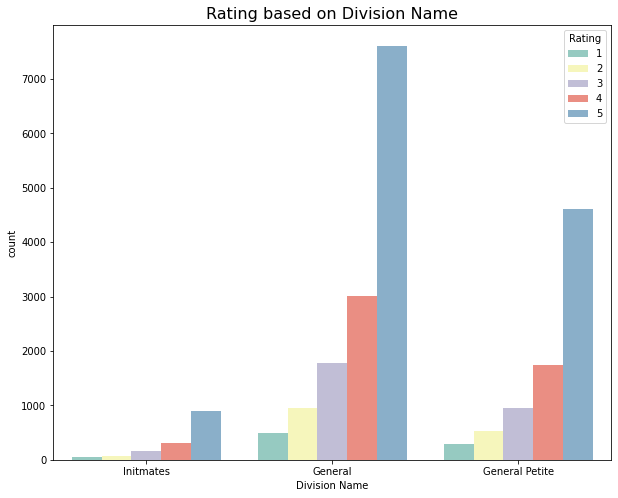

In [339]:
plt.figure(figsize=(10,8))
sns.countplot(x='Division Name',data=df,hue='Rating',palette='Set3')
plt.title('Rating based on Division Name', fontsize=16)

 **Categoring Classes based on Ratings**

Text(0.5, 1.0, 'Categoring Classes based on Ratings')

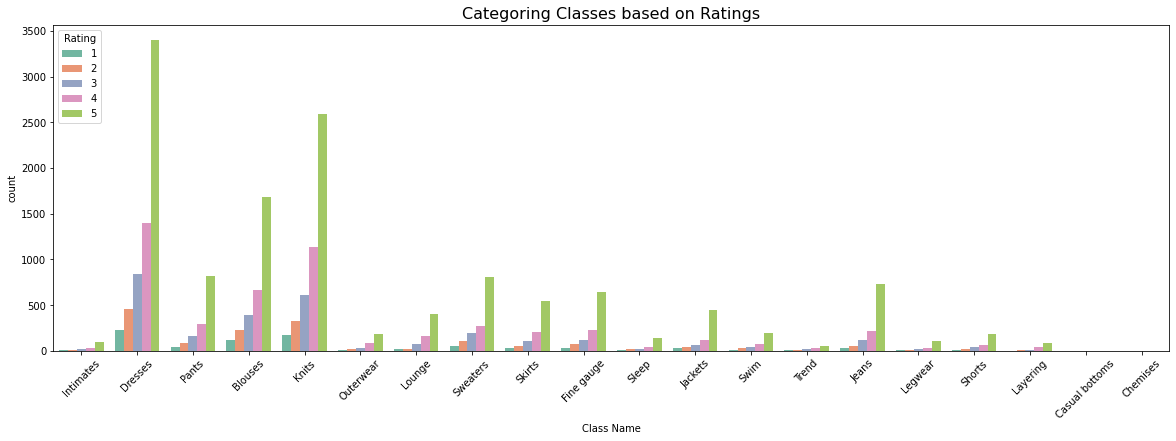

In [340]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df,hue='Rating',palette='Set2')
plt.xticks(rotation = 45)
plt.title('Categoring Classes based on Ratings', fontsize=16)

# Items sold according to Department,Class and Division

In [302]:
df['Department Name'].value_counts()

Tops        10468
Dresses      6319
Bottoms      3799
Intimate     1735
Jackets      1032
Trend         119
Name: Department Name, dtype: int64

In [303]:
df['Class Name'].value_counts()

Dresses           6319
Knits             4843
Blouses           3097
Sweaters          1428
Pants             1388
Jeans             1147
Fine gauge        1100
Skirts             945
Jackets            704
Lounge             691
Swim               350
Outerwear          328
Shorts             317
Sleep              228
Legwear            165
Intimates          154
Layering           146
Trend              119
Casual bottoms       2
Chemises             1
Name: Class Name, dtype: int64

**Dresses are sold more, which are around 6400 units and then kints around 5000 units.**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

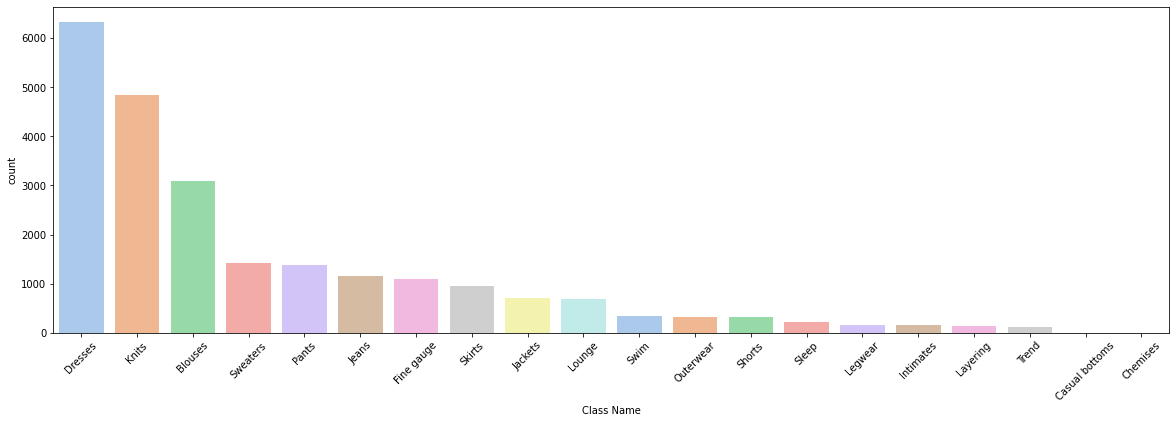

In [304]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='pastel', order=df['Class Name'].value_counts().index)
plt.xticks(rotation = 45)

***Classifying classes based on department name***

**Through the plot we can infer that a large number of Dresses fall on Dresses category, Blouses, knits, sweaters, fine gauge falls on tops category**

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text major ticklabel objects>)

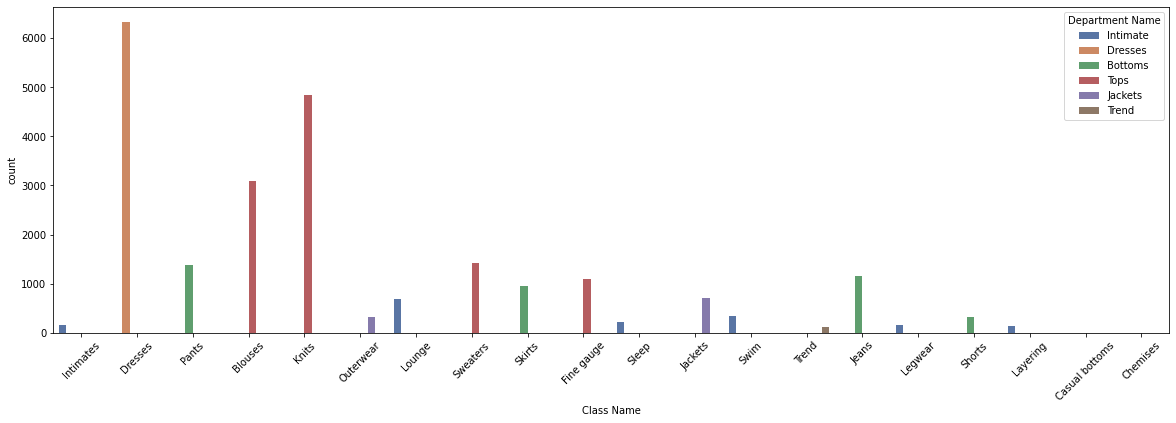

In [305]:
plt.figure(figsize = (20,6))
sns.countplot(x='Class Name', data=df, palette='deep', hue='Department Name')
plt.xticks(rotation = 45)

***Departments in Each Division***

**Dresses, bottoms, Tops comes in general division**

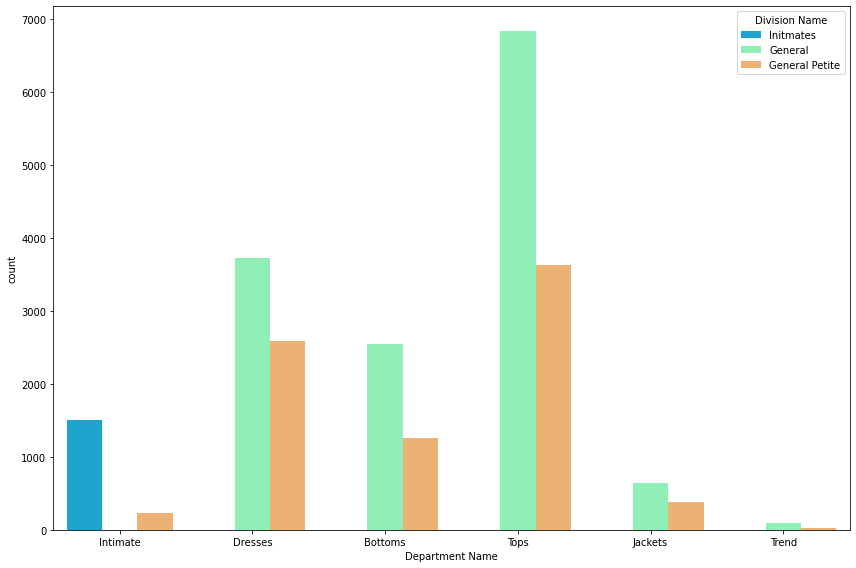

In [341]:
plt.figure(figsize = (12,8))
sns.countplot(x="Department Name", data=df, palette='rainbow', hue='Division Name')
plt.tight_layout()

***Department based on Rating***

**Tops are on high rating of 5 and dress are followed by Tops**

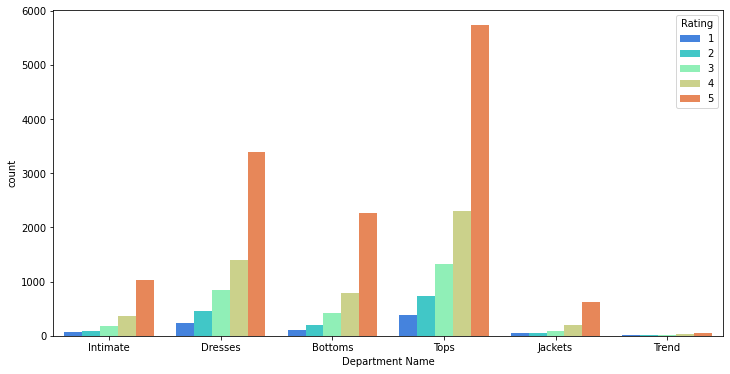

In [307]:
plt.figure(figsize = (12,6))
sns.countplot(x='Department Name',data=df,hue='Rating',palette='rainbow')

# **Age of customers**

In [308]:
df['Age'].nunique()

77

In [309]:
df['Age'].max()

99

In [310]:
df['Age'].min()

18

In [311]:
df['Age'].mean()

43.198543813335604

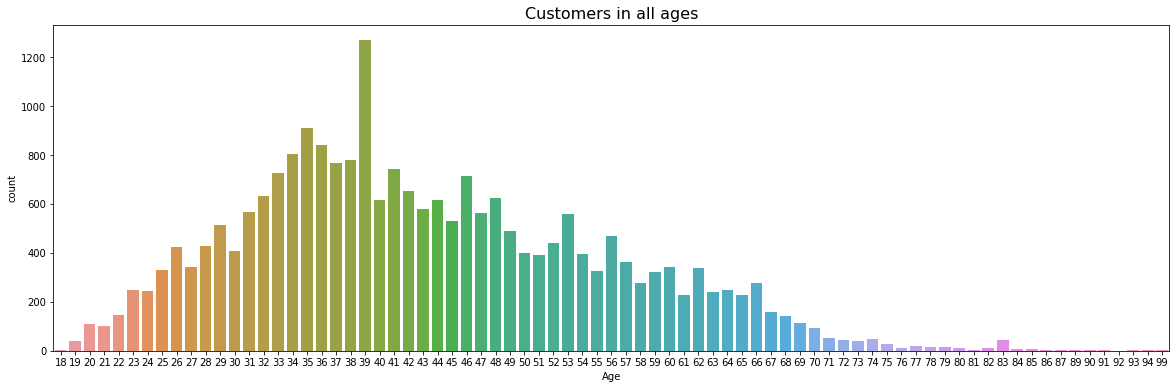

In [342]:
plt.figure(figsize = (20,6))
sns.countplot(x = 'Age', data = df)
plt.title('Customers in all ages', fontsize=16)
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


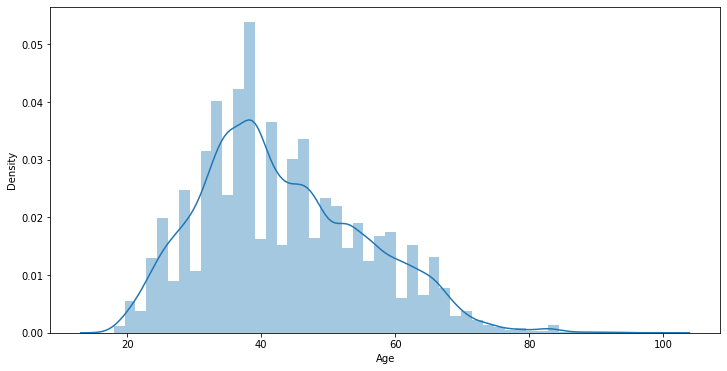

In [313]:
plt.figure(figsize = (12,6))
sns.distplot(df['Age'],bins=50);

***Customers age and Rating***

**From the plot below, we can infer that most of the customers have given a rating of 5 and they are around age 40.**

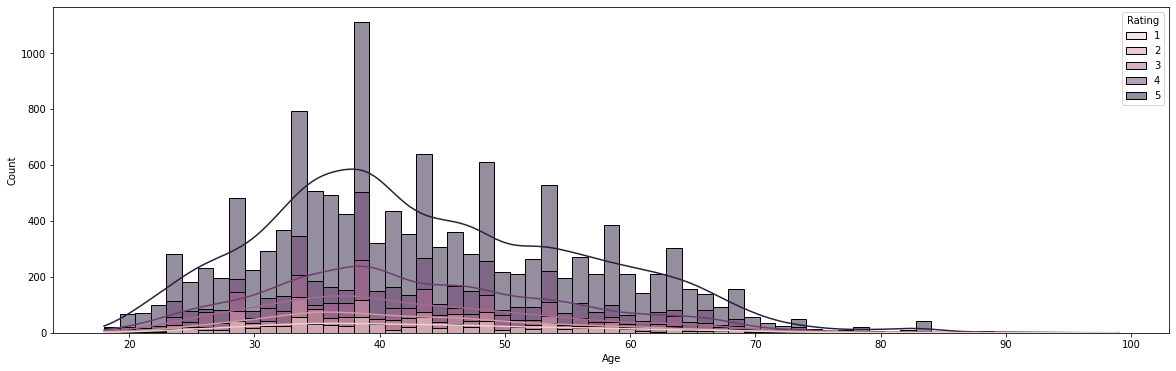

In [314]:
plt.figure(figsize = (20,6))
sns.histplot( data=df, x= 'Age', bins='auto', hue='Rating', kde=True) 

***From the plot below, most of the customers who have given a rating of 4 and 5, have recommended the product***

<Figure size 1440x432 with 0 Axes>

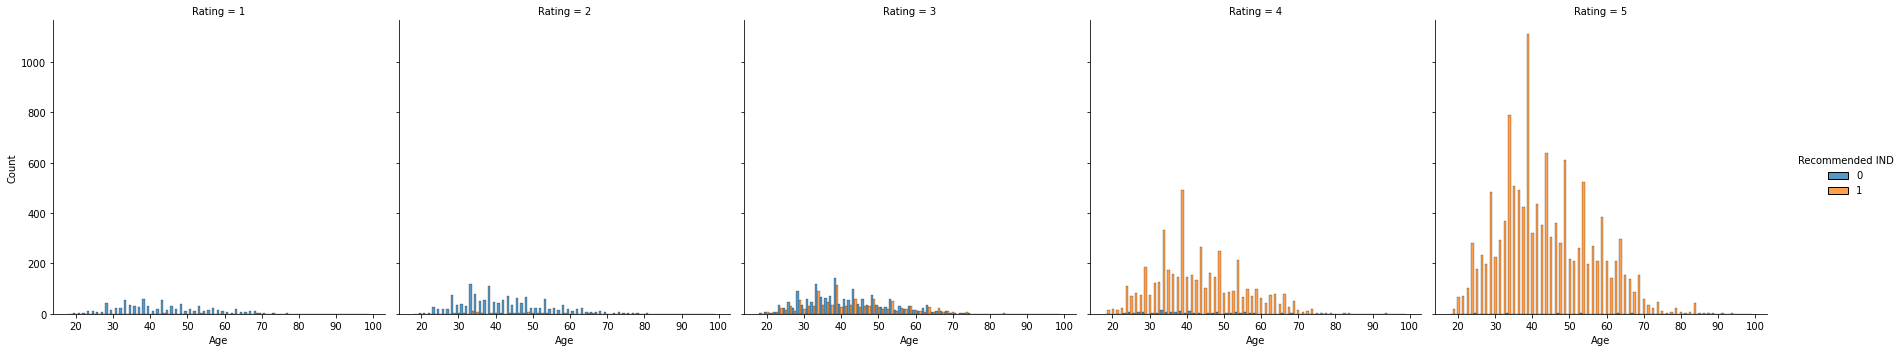

In [315]:
plt.figure(figsize = (20,6))
sns.displot(df, x="Age", col="Rating", multiple="dodge", hue='Recommended IND')

***Grouping according to ratings***

In [316]:
df=df.drop(['Unnamed: 0'], axis=1)

In [317]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [318]:
rating_grouped=df.groupby('Rating').mean()

In [319]:
rating_grouped

,Age,Recommended IND,Positive Feedback Count
Rating,,,
1,43.693587,0.019002,3.459620
2,42.622364,0.060064,3.325879
3,42.158481,0.414141,3.145246
4,42.887532,0.966910,2.405554
5,43.583124,0.998096,2.299749


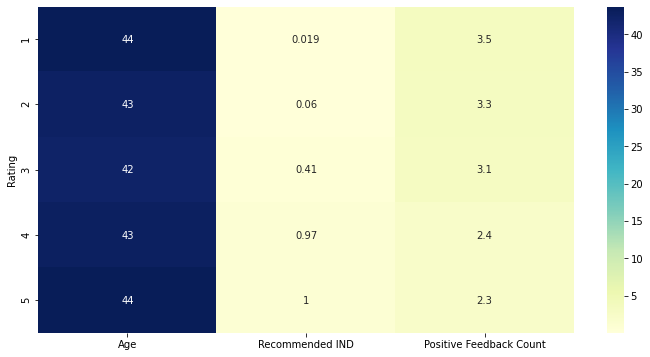

In [320]:
plt.figure(figsize=(12,6))
sns.heatmap(rating_grouped,annot=True,cmap='YlGnBu')

In [321]:
rating_grouped.corr()

,Age,Recommended IND,Positive Feedback Count
Age,1.000000,0.115681,-0.194958
Recommended IND,0.115681,1.000000,-0.987748
Positive Feedback Count,-0.194958,-0.987748,1.000000


Text(0.5, 1.0, 'Heatmap correlated based on Rating')

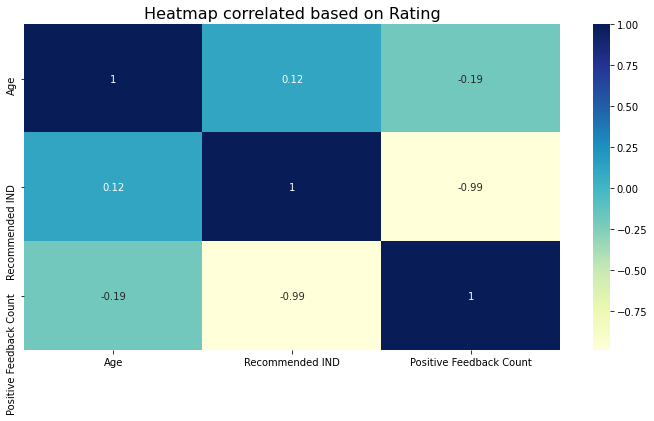

In [333]:
plt.figure(figsize=(12,6))
sns.heatmap(rating_grouped.corr(), annot=True , cmap='YlGnBu')
plt.title('Heatmap correlated based on Rating', fontsize=16)

# **Grouping according to Age**

In [323]:
df['Age'].value_counts()

39    1269
35     909
36     842
34     804
38     780
      ... 
93       2
90       2
86       2
99       2
92       1
Name: Age, Length: 77, dtype: int64

In [324]:
df['Age']=df['Age'].astype(int)

In [325]:
df.head()

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [326]:
df['Age'].dtype

dtype('int64')

**dividing age group into categories**

In [327]:
def age_cat(age):
    if age < 20:
        return 'teens'
    elif age < 30 :
        return '20s'
    elif age < 40 :
        return '30s'
    elif  age < 50 :
        return '40s'
    elif  age < 60 :
        return '50s' 
    elif  age < 70 :
        return '60s'
    else:
        return 'above 70s'

In [328]:
df['age_categorize'] = df['Age'].apply(age_cat)

In [329]:
df.head(3)

,Age,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name,age_categorize
0,33,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates,30s
1,34,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses,30s
2,60,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses,60s


In [330]:
df['age_categorize'].value_counts()

30s          7702
40s          6127
50s          3948
20s          2887
60s          2305
above 70s     473
teens          44
Name: age_categorize, dtype: int64

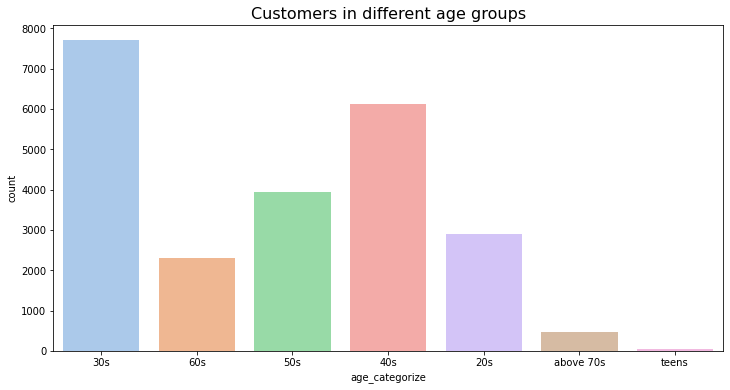

In [332]:
plt.figure(figsize=(12,6))
sns.countplot(x='age_categorize',data=df, palette= 'pastel' )
plt.title('Customers in different age groups', fontsize=16)
plt.show()

From the above plot we can infer that, customers in 30s are more, followed by customers of age in 40s, and then age between 50s and 20s.